In [1]:
import pandas as pd

## Load Data
1. [Dataset](https://www.kaggle.com/datasets/anubhavgoyal10/laptop-prices-dataset)

In [2]:
data = pd.read_csv("laptopPrice.csv")
data

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,135990,3 stars,0,0
819,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,144990,3 stars,0,0
820,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,149990,3 stars,0,0
821,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,142990,3 stars,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

## Data Preprocessing

### Drop Duplicates

In [4]:
data = data[~data.duplicated()].reset_index(drop=True)
data

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,135990,3 stars,0,0
798,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,144990,3 stars,0,0
799,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,149990,3 stars,0,0
800,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,142990,3 stars,0,0


In [5]:
for col in data.columns:
    print(col, data[col].unique())

brand ['ASUS' 'Lenovo' 'acer' 'Avita' 'HP' 'DELL' 'MSI' 'APPLE']
processor_brand ['Intel' 'AMD' 'M1']
processor_name ['Core i3' 'Core i5' 'Celeron Dual' 'Ryzen 5' 'Core i7' 'Core i9' 'M1'
 'Pentium Quad' 'Ryzen 3' 'Ryzen 7' 'Ryzen 9']
processor_gnrtn ['10th' 'Not Available' '11th' '7th' '8th' '9th' '4th' '12th']
ram_gb ['4 GB' '8 GB' '16 GB' '32 GB']
ram_type ['DDR4' 'LPDDR4' 'LPDDR4X' 'DDR5' 'DDR3' 'LPDDR3']
ssd ['0 GB' '512 GB' '256 GB' '128 GB' '1024 GB' '2048 GB' '3072 GB']
hdd ['1024 GB' '0 GB' '512 GB' '2048 GB']
os ['Windows' 'DOS' 'Mac']
os_bit ['64-bit' '32-bit']
graphic_card_gb ['0 GB' '2 GB' '4 GB' '6 GB' '8 GB']
weight ['Casual' 'ThinNlight' 'Gaming']
warranty ['No warranty' '1 year' '2 years' '3 years']
Touchscreen ['No' 'Yes']
msoffice ['No' 'Yes']
Price [ 34649  38999  39999  69990  26990  22990  21990  58799  49999  59990
  93700  72990  17490  35990  56490  65390  31999  32490  31799  29890
  23990  32955  46200  34429  37990  33980  39990  39490  53990  38990
  37890 

### Encode categorical columns

In [6]:
categorical = ['brand', 'processor_brand', 'processor_name', 'ram_type', 'os', 'weight']

In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [8]:
for column in categorical:
    data[column] = label_encoder.fit_transform(data[column])

In [16]:
for col in ['Touchscreen', 'msoffice']:
    data[col] = data[col].map({'No':0, 'Yes':1})

In [9]:
data.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,1,1,1,10th,4 GB,1,0 GB,1024 GB,2,64-bit,0 GB,0,No warranty,No,No,34649,2 stars,3,0
1,5,1,1,10th,4 GB,1,0 GB,1024 GB,2,64-bit,0 GB,0,No warranty,No,No,38999,3 stars,65,5
2,5,1,1,10th,4 GB,1,0 GB,1024 GB,2,64-bit,0 GB,0,No warranty,No,No,39999,3 stars,8,1
3,1,1,2,10th,8 GB,1,512 GB,0 GB,2,32-bit,2 GB,0,No warranty,No,No,69990,3 stars,0,0
4,1,1,0,Not Available,4 GB,1,0 GB,512 GB,2,64-bit,0 GB,0,No warranty,No,No,26990,3 stars,0,0


### Clean numerical columns

In [10]:
def clean_gb(x):
    return x[:-3]

In [11]:
gb_columns = ['ram_gb', 'ssd', 'hdd', 'graphic_card_gb']

In [12]:
for col in gb_columns:
    data[col] = data[col].apply(clean_gb)

In [13]:
data['os_bit'] = data['os_bit'].apply(lambda x:x[:2])
data['rating'] = data['rating'].apply(lambda x:x[:1])
data['processor_gnrtn'] = data['processor_gnrtn'].apply(lambda x:x[:-2] if 'th' in x else 0)
data['warranty'] = data['warranty'].apply(lambda x:x[0] if "year" in x else 0)

In [17]:
data.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,1,1,1,10,4,1,0,1024,2,64,0,0,0,0,0,34649,2,3,0
1,5,1,1,10,4,1,0,1024,2,64,0,0,0,0,0,38999,3,65,5
2,5,1,1,10,4,1,0,1024,2,64,0,0,0,0,0,39999,3,8,1
3,1,1,2,10,8,1,512,0,2,32,2,0,0,0,0,69990,3,0,0
4,1,1,0,0,4,1,0,512,2,64,0,0,0,0,0,26990,3,0,0


### Make Price a Categorical Variable

The Price is currently in rupees, convert to Dollar

In [24]:
data['Price'] = data['Price'].apply(lambda x:x*0.012)

In [25]:
import matplotlib.pyplot as plt

(array([345., 303.,  93.,  38.,   8.,  10.,   4.,   0.,   0.,   1.]),
 array([ 203.88,  713.88, 1223.88, 1733.88, 2243.88, 2753.88, 3263.88,
        3773.88, 4283.88, 4793.88, 5303.88]),
 <BarContainer object of 10 artists>)

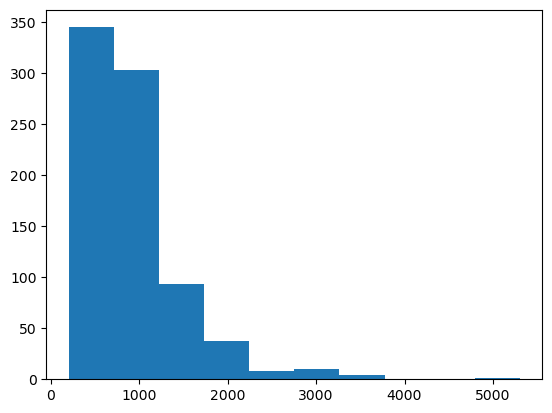

In [28]:
# visualize spread 
plt.hist(data['Price'], bins=10)

Put the price in categories based on these rules:
* <= 1000: Affordable (0)
* 1000 < x <= 2000: Expensive (1)
* 2000 < x <= 3000: Very Expensive (2)
* \> 3000: Outrageous (3)

In [30]:
data['Price'] = pd.cut(data['Price'], bins=[-float('inf'), 1000, 2000, 3000, float('inf')], labels=[0, 1, 2, 3], include_lowest=True, right=False)

In [31]:
data.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,1,1,1,10,4,1,0,1024,2,64,0,0,0,0,0,0,2,3,0
1,5,1,1,10,4,1,0,1024,2,64,0,0,0,0,0,0,3,65,5
2,5,1,1,10,4,1,0,1024,2,64,0,0,0,0,0,0,3,8,1
3,1,1,2,10,8,1,512,0,2,32,2,0,0,0,0,0,3,0,0
4,1,1,0,0,4,1,0,512,2,64,0,0,0,0,0,0,3,0,0


In [32]:
import seaborn as sns

### Drop Highly Correlated Columns

C:\Users\tomis\AppData\Local\Temp\ipykernel_50336\2413583662.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)


<Axes: >

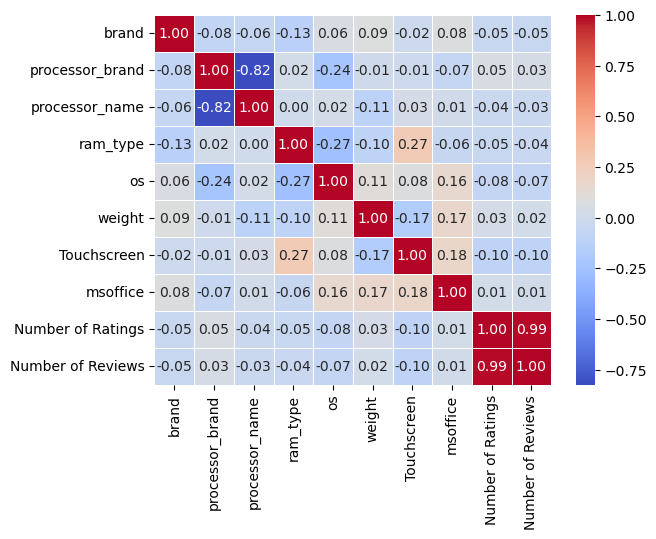

In [37]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

Processor name and Processor brand, as well as number of ratings and number of reviews, are highly correlated, so let's drop one from either column

In [39]:
data.drop(['processor_name', 'Number of Reviews'], axis=1, inplace=True)

In [41]:
data.head()

,brand,processor_brand,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings
0,1,1,10,4,1,0,1024,2,64,0,0,0,0,0,0,2,3
1,5,1,10,4,1,0,1024,2,64,0,0,0,0,0,0,3,65
2,5,1,10,4,1,0,1024,2,64,0,0,0,0,0,0,3,8
3,1,1,10,8,1,512,0,2,32,2,0,0,0,0,0,3,0
4,1,1,0,4,1,0,512,2,64,0,0,0,0,0,0,3,0


In [42]:
data.head()

,brand,processor_brand,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings
0,1,1,10,4,1,0,1024,2,64,0,0,0,0,0,0,2,3
1,5,1,10,4,1,0,1024,2,64,0,0,0,0,0,0,3,65
2,5,1,10,4,1,0,1024,2,64,0,0,0,0,0,0,3,8
3,1,1,10,8,1,512,0,2,32,2,0,0,0,0,0,3,0
4,1,1,0,4,1,0,512,2,64,0,0,0,0,0,0,3,0


Since most of the variables are categorical, standardization is not really too needed for most columns, we can standardize the Number of Ratings column.

In [47]:
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()

In [50]:
data['Number of Ratings'] = scaler.fit_transform(np.array(data['Number of Ratings']).reshape(-1,1)).flatten()

In [51]:
data.head()

,brand,processor_brand,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings
0,1,1,10,4,1,0,1024,2,64,0,0,0,0,0,0,2,-0.296500
1,5,1,10,4,1,0,1024,2,64,0,0,0,0,0,0,3,-0.234572
2,5,1,10,4,1,0,1024,2,64,0,0,0,0,0,0,3,-0.291506
3,1,1,10,8,1,512,0,2,32,2,0,0,0,0,0,3,-0.299497
4,1,1,0,4,1,0,512,2,64,0,0,0,0,0,0,3,-0.299497
